In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("arrests.csv")

trespass_df = df[df['OFFENSES'].str.contains('TRESPASS', case=False, na=False)]
trespass_counts = trespass_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
trespass_counts.columns = ['INCIDENTNEIGHBORHOOD', 'TRESPASS_ARRESTS']
total_arrests = df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
total_arrests.columns = ['INCIDENTNEIGHBORHOOD', 'TOTAL_ARRESTS']

result_df = pd.merge(trespass_counts, total_arrests, on='INCIDENTNEIGHBORHOOD', how='left')

result_df['PERCENT_TRESPASS'] = (result_df['TRESPASS_ARRESTS'] / result_df['TOTAL_ARRESTS']) * 100
result_df.sort_values(by='PERCENT_TRESPASS', inplace=True)
print(result_df)
arrests = (result_df['TRESPASS_ARRESTS'].sum() / result_df['TOTAL_ARRESTS'].sum())
print("Average Percent Trespass: ", arrests*100)

   INCIDENTNEIGHBORHOOD  TRESPASS_ARRESTS  TOTAL_ARRESTS  PERCENT_TRESPASS
89         Outside City                 1            310          0.322581
90    Arlington Heights                 1            153          0.653595
80           Upper Hill                 4            365          1.095890
87              Windgap                 2            123          1.626016
79             West End                 5            281          1.779359
..                  ...               ...            ...               ...
85    Central Northside                 2             23          8.695652
57         Mount Oliver                11            123          8.943089
16      Central Oakland                48            512          9.375000
6              Fineview                86            790         10.886076
2           North Shore               155            803         19.302615

[93 rows x 4 columns]
Average Percent Trespass:  4.6989487097801845


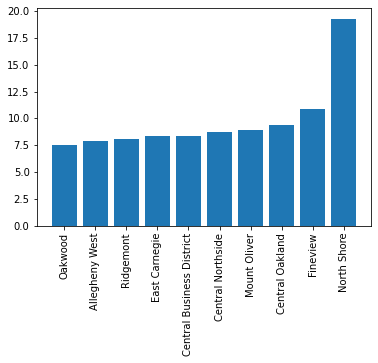

In [24]:
plt.bar(result_df['INCIDENTNEIGHBORHOOD'][83:], result_df['PERCENT_TRESPASS'][83:])
plt.xticks(rotation='vertical')
plt.show()


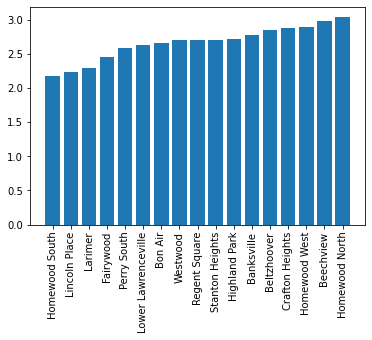

In [25]:
plt.bar(result_df['INCIDENTNEIGHBORHOOD'][11:28], result_df['PERCENT_TRESPASS'][11:28])
plt.xticks(rotation='vertical')
plt.show()

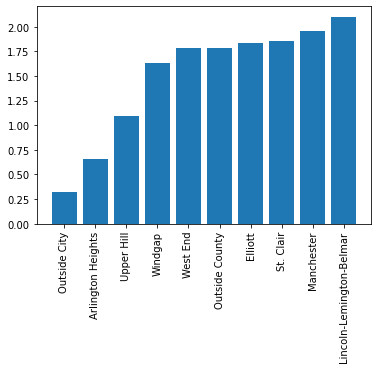

In [26]:
plt.bar(result_df['INCIDENTNEIGHBORHOOD'][:10], result_df['PERCENT_TRESPASS'][:10])
plt.xticks(rotation='vertical')
plt.show()